In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from numpy.ma.core import ceil
from scipy.spatial import distance #distance calculation
from sklearn.preprocessing import MinMaxScaler #normalisation
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score #scoring
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from matplotlib import animation, colors
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_excel("/Users/alsabbaghs/Downloads/DryBeanDataset/Dry_Bean_Dataset.xlsx")
df.head()
df["Class"].value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

In [3]:
df["Class"] = df["Class"].replace({"DERMASON": 1, "SIRA": 2, "SEKER": 6, "HOROZ": 4, "CALI": 5, "BARBUNYA": 0, "BOMBAY": 3})

In [4]:
X = df.drop("Class", axis = 1)
Y = df["Class"]

In [5]:
#Normalization
def minmax_scaler(data):
    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(data)
    return scaled

#Euclidean distance
def e_distance(x, y):
    return distance.euclidean(x, y)

#Manhanttan distance
def m_distance(x, y):
    return distance.cityblock(x, y)

#Best Matching Unit search
def winning_neuron(data, t, som, num_rows, num_cols):
  winner = [0,0]
  shortest_distance = np.sqrt(data.shape[1]) # initialise with max distance
  input_data = data[t]
  for row in range(num_rows):
    for col in range(num_cols):
      distance = e_distance(som[row][col], data[t])
      if distance < shortest_distance: 
        shortest_distance = distance
        winner = [row,col]
  return winner

#Learning rate and neighbourhood range calculation
def decay(step, max_steps,max_learning_rate,max_m_dsitance):
  coefficient = 1.0 - (np.float64(step)/max_steps)
  learning_rate = coefficient*max_learning_rate
  neighbourhood_range = ceil(coefficient * max_m_dsitance)
  return learning_rate, neighbourhood_range



In [8]:
num_rows = 30
num_cols = 30
max_m_dsitance = 4
max_learning_rate = 0.5
max_steps = 50000

In [9]:
pca = PCA(n_components=7)
principalComponents = pca.fit_transform(X)
print(principalComponents)

[[-3.51499237e+04 -2.20868414e+01  8.32067957e+01 ...  2.16131003e+00
   1.21042196e+00 -2.18685914e-02]
 [-3.45863219e+04  5.85865649e+01  7.31450790e+01 ...  9.16348619e+00
   2.54858142e+00 -5.73115821e-02]
 [-3.37640263e+04 -3.89953729e+01  7.45121433e+01 ...  2.68196277e+00
   1.10351679e+00 -3.34772502e-02]
 ...
 [-1.56345152e+04 -8.72390530e+01  1.24999846e+01 ... -3.64666219e+00
  -5.13075686e-01  3.25153468e-02]
 [-1.55590550e+04 -2.40310051e+01  1.37846596e+01 ... -3.39085819e+00
  -4.73084089e-01  5.41626410e-02]
 [-1.55983141e+04 -7.82400447e+01 -4.58653076e+00 ... -1.19139880e+00
  -8.59216479e-01 -3.26621970e-02]]


In [10]:
#mian function

#x_norm = minmax_scaler(X) # normalisation
x_norm = minmax_scaler(principalComponents)
# initialising self-organising map
num_dims = x_norm.shape[1] # numnber of dimensions in the input data
np.random.seed(40)
som = np.random.random_sample(size=(num_rows, num_cols, num_dims)) # map construction

# start training iterations
for step in range(max_steps):
  if (step+1) % 1000 == 0:
    print("Iteration: ", step+1) # print out the current iteration for every 1k
  learning_rate, neighbourhood_range = decay(step, max_steps,max_learning_rate,max_m_dsitance)

  t = np.random.randint(0,high=x_norm.shape[0]) # random index of traing data
  winner = winning_neuron(x_norm, t, som, num_rows, num_cols)
  for row in range(num_rows):
    for col in range(num_cols):
      if m_distance([row,col],winner) <= neighbourhood_range:
        som[row][col] += learning_rate*(x_norm[t]-som[row][col]) #update neighbour's weight

print("SOM training completed")

Iteration:  1000
Iteration:  2000
Iteration:  3000
Iteration:  4000
Iteration:  5000
Iteration:  6000
Iteration:  7000
Iteration:  8000
Iteration:  9000
Iteration:  10000
Iteration:  11000
Iteration:  12000
Iteration:  13000
Iteration:  14000
Iteration:  15000
Iteration:  16000
Iteration:  17000
Iteration:  18000
Iteration:  19000
Iteration:  20000
Iteration:  21000
Iteration:  22000
Iteration:  23000
Iteration:  24000
Iteration:  25000
Iteration:  26000
Iteration:  27000
Iteration:  28000
Iteration:  29000
Iteration:  30000
Iteration:  31000
Iteration:  32000
Iteration:  33000
Iteration:  34000
Iteration:  35000
Iteration:  36000
Iteration:  37000
Iteration:  38000
Iteration:  39000
Iteration:  40000
Iteration:  41000
Iteration:  42000
Iteration:  43000
Iteration:  44000
Iteration:  45000
Iteration:  46000
Iteration:  47000
Iteration:  48000
Iteration:  49000
Iteration:  50000
SOM training completed


In [11]:
label_data = np.array(Y)
map = np.empty(shape=(num_rows, num_cols), dtype=object)


for row in range(num_rows):
  for col in range(num_cols):
    map[row][col] = [] # empty list to store the label

for t in range(x_norm.shape[0]):
  if (t+1) % 1000 == 0:
    print("sample data: ", t+1)
  winner = winning_neuron(x_norm, t, som, num_rows, num_cols)
  #print(winner)
  map[winner[0]][winner[1]].append(label_data[t]) # label of winning neuron


sample data:  1000
sample data:  2000
sample data:  3000
sample data:  4000
sample data:  5000
sample data:  6000
sample data:  7000
sample data:  8000
sample data:  9000
sample data:  10000
sample data:  11000
sample data:  12000
sample data:  13000


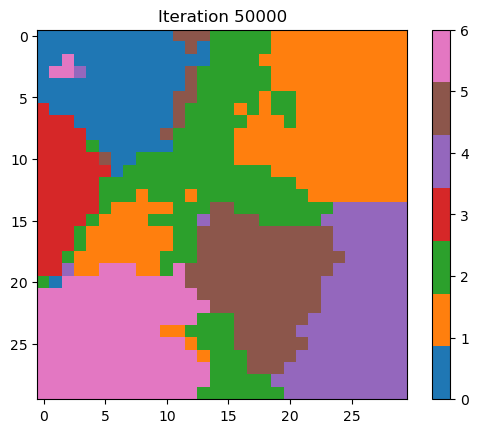

In [12]:
num_colors = 7
label_map = np.zeros(shape=(num_rows, num_cols),dtype=np.int64)
for row in range(num_rows):
  for col in range(num_cols):
    label_list = map[row][col]
    if len(label_list)==0:
      label = 2
    else:
      label = max(label_list, key=label_list.count)
    label_map[row][col] = label

title = ('Iteration ' + str(max_steps))
cmap = colors.ListedColormap(colors=['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink'][:num_colors])
plt.imshow(label_map, cmap=cmap)
plt.colorbar()
plt.title(title)
plt.show()

In [13]:
# test data

# using the trained som, search the winning node of corresponding to the test data
# get the label of the winning node

data = minmax_scaler(principalComponents) # normalisation 
winner_labels = []

for t in range(data.shape[0]):
 winner = winning_neuron(data, t, som, num_rows, num_cols)
 row = winner[0]
 col = winner[1]
 predicted = label_map[row][col]
 winner_labels.append(predicted)

print("Accuracy: ",accuracy_score(Y, np.array(winner_labels)))

Accuracy:  0.898537947248549


In [14]:
cm = confusion_matrix(Y, np.array(winner_labels))
cm

array([[1181,    0,   30,    0,    6,   89,   16],
       [   1, 3136,  337,    0,    9,    0,   63],
       [  14,  291, 2205,    0,   37,   17,   72],
       [   1,    0,    0,  521,    0,    0,    0],
       [   3,   23,   40,    0, 1804,   54,    4],
       [  36,    0,   24,    2,   45, 1516,    7],
       [  10,   36,  109,    0,    4,    1, 1867]])

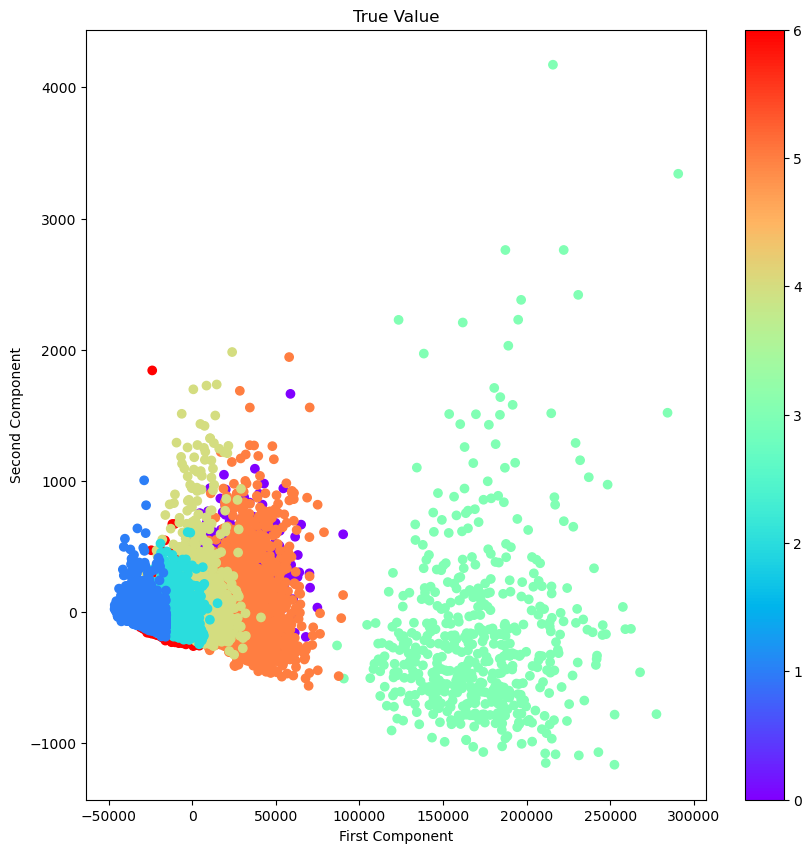

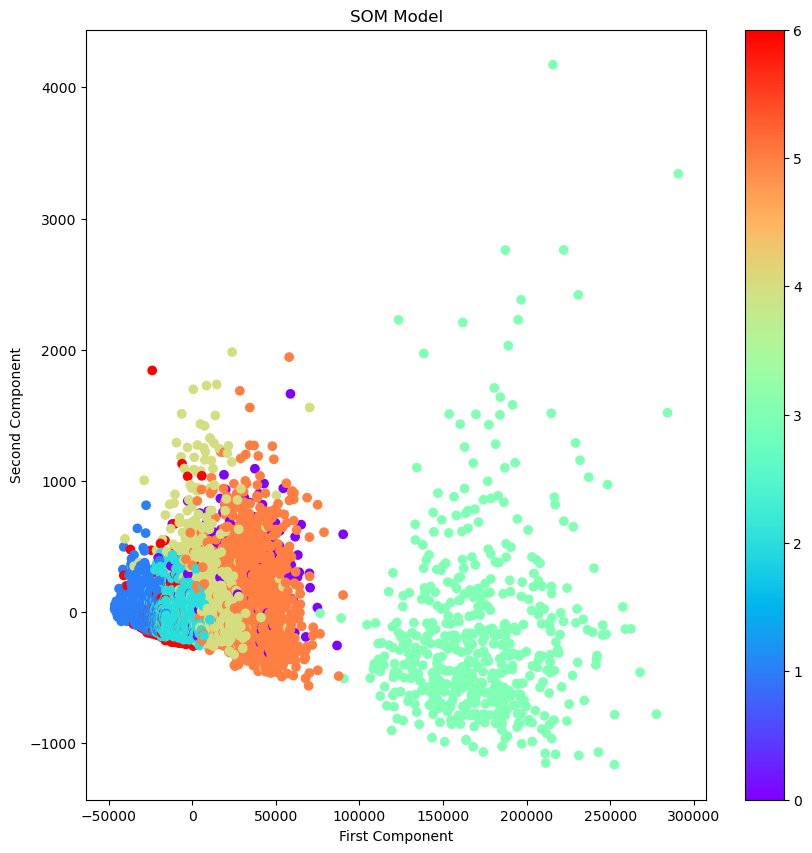

In [15]:
fig, ax = plt.subplots(figsize=(10, 10))
scatter = ax.scatter(principalComponents[:, 0], principalComponents[:, 1], c = Y, cmap='rainbow')
plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.title('True Value')
plt.colorbar(scatter)
plt.show()

fig, ax = plt.subplots(figsize=(10, 10))
scatter = ax.scatter(principalComponents[:, 0], principalComponents[:, 1], c = np.array(winner_labels), cmap='rainbow')
plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.title('SOM Model')
plt.colorbar(scatter)
plt.show()